## Ejercicio 3 — Emparejamiento de Símbolos (25%)

Utilice una **pila implementada mediante una lista doblemente ligada** para resolver el clásico problema de **emparejamiento de símbolos** como `{}`, `[]`, `()`.

El programa debe leer una **cadena de símbolos** y determinar si los caracteres de apertura y cierre están **correctamente emparejados** y **bien anidados**.

---

###  Ejemplos de entrada y salida esperada

```plaintext
((23[3+4]-9)+(8-9)[5])             Bien emparejado  
((23[3+4]-9)+(8-9[5])              Mal emparejado  
{(a-b}(890-89)[876-65]/90)         Mal emparejado


#### No se requieren supuestos adicionales sobre la lógica del problema.

#### Notemos en este laboratorio **NO EXISTE** la restricción sobre el uso de listas de python.

""" Entiendase 'listas de python' como cualquier estructura nativa de agrupación de datos:
python: list/sets/dict."""

#### Debido a que no existe esta restricción se usaran como parte de la solución, respetando la solicitud de trabajar con una pila doblemente ligada.


### **Validador de simbolos (Algoritmo)**

In [ ]:
class Node:
    """
    Nodo utilizado en la pila doblemente ligada.

    Attributes:
        value (Any): Valor que se almacena en el nodo.
        next (Node): Enlace al siguiente nodo (hacia abajo en la pila).
        previous (Node): Enlace al nodo anterior (hacia arriba en la pila).
    """

    def __init__(self, value):
        self.value = value
        self.next = None
        self.previous = None


class DoublyLinkedStack:
    """
    Estructura de tipo pila (LIFO) implementada mediante nodos doblemente ligados.

    La pila apila elementos en la parte superior (cima) y permite retirar
    siempre el último que se añadió.

    Attributes:
        top (Node): Nodo que está actualmente en la cima de la pila.
        size (int): Número de elementos actualmente apilados.
    """

    def __init__(self):
        """
        Inicializa una pila vacía.

        Se define la cima como None indicando que no hay elementos.
        El tamaño inicia en cero.
        """
        self.top = None
        self.size = 0

    def push(self, value):
        """
        Añade un nuevo nodo con un valor a la cima de la pila.

        Args:
            value (Any): Valor que se desea almacenar en el nuevo nodo.

        Proceso para apilar:
        1. Se crea un nuevo nodo con el valor proporcionado.
        2. Si la pila está vacía, ese nodo será la cima.
        3. Si no está vacía:
            3.1 El nuevo nodo apunta como anterior al nodo actual en la cima.
            3.2 El nodo actual en la cima apunta como siguiente al nuevo nodo.
            3.3 La cima se actualiza al nuevo nodo.
        4. Se incrementa el tamaño de la pila.
        """
        new_node = Node(value)  # 1
        if self.top is None:  # 2
            self.top = new_node
        else:  # 3
            new_node.previous = self.top  # 3.1
            self.top.next = new_node  # 3.2
            self.top = new_node  # 3.3
        self.size += 1  # 4

    def pop(self):
        """
        Elimina y retorna el valor que se encuentra en la cima de la pila.

        Returns:
            value (Any | None): El valor del nodo eliminado o None si la pila está vacía.

        Proceso para desapilar:
        1. Se verifica si la pila está vacía. Si lo está, no hay nada que quitar.
        2. Se guarda el valor de la cima actual.
        3. Se actualiza la cima al nodo anterior.
        4. Si la nueva cima existe, se desvincula su siguiente.
        5. Se reduce el tamaño de la pila.
        """
        if self.top is None:  # 1
            return None

        value = self.top.value  # 2
        self.top = self.top.previous  # 3
        if self.top is not None:  # 4
            self.top.next = None
        self.size -= 1  # 5
        return value

    def is_empty(self):
        """
        Verifica si la pila está vacía.

        Returns:
            bool: True si no hay elementos en la pila, False en caso contrario.
        """
        return self.top is None


class SymbolMatcher:
    """
    Clase que se encarga de verificar si los símbolos de apertura y cierre como (), [], {}
    están correctamente emparejados dentro de una cadena.

    Utiliza una pila (implementada como lista doblemente ligada) para ir almacenando
    los símbolos de apertura a medida que aparecen y validando que cada símbolo de
    cierre corresponda correctamente con el último de apertura.

    Attributes:
        cadena (str): Expresión que contiene los símbolos a validar.
        pila (DoublyLinkedStack): Pila para llevar el seguimiento de los símbolos de apertura.
        pares (dict): Diccionario que relaciona cada símbolo de cierre con su apertura.
        set_apertura (set): Conjunto de símbolos de apertura {'(', '[', '{'}.
        set_cierre (set): Conjunto de símbolos de cierre {')', ']', '}'}.
    """

    def __init__(self, cadena):
        """
        Inicializa la estructura con la cadena que se desea validar.

        Args:
            cadena (str): Cadena a analizar, puede contener cualquier texto.
        """
        self.cadena = cadena
        self.pila = DoublyLinkedStack()

        # Diccionario que mapea cada símbolo de cierre con su correspondiente símbolo de apertura
        self.pares = {")": "(", "]": "[", "}": "{"}

        # Conjuntos auxiliares para identificar tipos de símbolos más rápidamente
        self.set_apertura = set(self.pares.values())
        self.set_cierre = set(self.pares)

    def validar(self):
        """
        Verifica si los símbolos de apertura y cierre están correctamente emparejados.

        Returns:
            bool: True si el emparejamiento es válido (bien cerrado y bien anidado), False si hay error.

        Proceso para validar coincidencias:

        1. Recorremos cada carácter de la cadena.
        2. Si el carácter es un símbolo de apertura, lo apilamos.
        3. Si el carácter es un símbolo de cierre:
            - Verificamos que la pila no esté vacía.
            - Retiramos el último símbolo apilado y comprobamos que coincida con la apertura esperada.
            - Si no coincide, no logramos emparejamiento, y retornamos False de inmediato.
        4. Finalmente, si la pila está vacía, significa que todos los símbolos se cerraron correctamente.
        """
        for caracter in self.cadena:
            if caracter in self.set_apertura:  # Paso 2
                self.pila.push(caracter)
            elif caracter in self.set_cierre:  # Paso 3
                if self.pila.is_empty() or self.pila.pop() != self.pares[caracter]:
                    return False
        return self.pila.is_empty()  # Paso 4

###  **Ejemplos de uso**

Para probar los ejemplos propuestos, simplemente debes cambiar el argumento del constructor de la clase `SymbolMatcher`:

```python
validador = SymbolMatcher(ejemplo5)



In [ ]:
# Ejemplos de uso
ejemplo1 = "((23[3+4]-9)+(8-9)[5])"  # Bien emparejado
ejemplo2 = "((23[3+4]-9)+(8-9[5])"  # Mal emparejado
ejemplo3 = "((a-b)(890-89)[876-65]/90)"  # Bien emparejado
ejemplo5 = "{(a-b}(890-89)[876-65]/90)"  # Mal emparejado
ejemplo4 = "(1+1) - [2+4{5+8})]"

validador = SymbolMatcher(ejemplo1)
print(f"Ejemplo 1: {'Bien' if validador.validar() else 'Mal'} emparejado")

### **Análisis de la complejidad computacional [Análisis del Punto 3](./analisis_punto3.MD)**

### **Grafica complejidad computacional (Algoritmo)**

In [10]:
import matplotlib.pyplot as plt
import numpy as np

class SymbolMatcherPlot:
    """
    Clase encargada de representar gráficamente el comportamiento del algoritmo SymbolMatcher,
    específicamente su crecimiento lineal (O(n)) respecto al tamaño (Número de caracteres), de la cadena analizada.

    Esta clase permite generar, visualizar una gráfica de T(n) = n,
    lo cual representa el número de operaciones realizadas a medida que crece el numero de elementos de entrada.
    """

    def __init__(self, n_max=3000):
        """
        Inicializa la clase con los parámetros base para la construcción de la gráfica.

        Args:
            n_max (int): Límite superior del eje horizontal (X), que simula la longitud máxima
                         de la cadena analizada por el algoritmo SymbolMatcher.
        """
        self.n_max = n_max
        self.n = None               # Vector con valores de n desde 0 hasta n_max
        self.operaciones = None    # Vector que representa T(n) = n
        self.referencias = [100, 1000, 2000, 3000]  # Puntos de referencia destacados en la curva

    def generar_datos(self):
        """
        Genera los datos base que serán usados para graficar.

        1. Se construye una secuencia de 0 a n_max con pasos de 1.
        2. La función teórica es T(n) = n, por lo que se usa directamente esa misma secuencia como valores de operaciones.
        """
        self.n = np.linspace(0, self.n_max, self.n_max + 1)  # Paso 1
        self.operaciones = self.n                            # Paso 2

    def graficar(self):
        """
        Dibuja en pantalla una gráfica de la función T(n) = n para ilustrar su comportamiento lineal.

        Proceso para graficar:
        1. Si los datos aún no se han generado, se invoca generar_datos().
        2. Se crea la figura con título, ejes y leyenda.
        3. Se dibuja la curva teórica en azul.
        4. Se añaden puntos de referencia (n = 100, 1000, ...) en rojo para destacar valores clave.
        5. Finalmente, se muestra la gráfica en pantalla.
        """
        if self.n is None or self.operaciones is None:
            self.generar_datos()  # Paso 1

        # Paso 2
        plt.figure(figsize=(10, 6))
        plt.title("Complejidad Computacional O(n) del Validador de Símbolos")
        plt.xlabel("Longitud de la cadena (n)")
        plt.ylabel("Cantidad de operaciones realizadas")

        # Paso 3
        plt.plot(self.n, self.operaciones, label='T(n) = n (O(n))', color='blue')

        # Paso 4
        for ref in self.referencias:
            plt.scatter(ref, ref, color='red')
            plt.text(ref, ref, f'({ref}, {ref})', verticalalignment='bottom')

        # Paso 5
        plt.legend()
        plt.grid(True)
        plt.show()



### **Ejemplo de uso, generación grafica.**

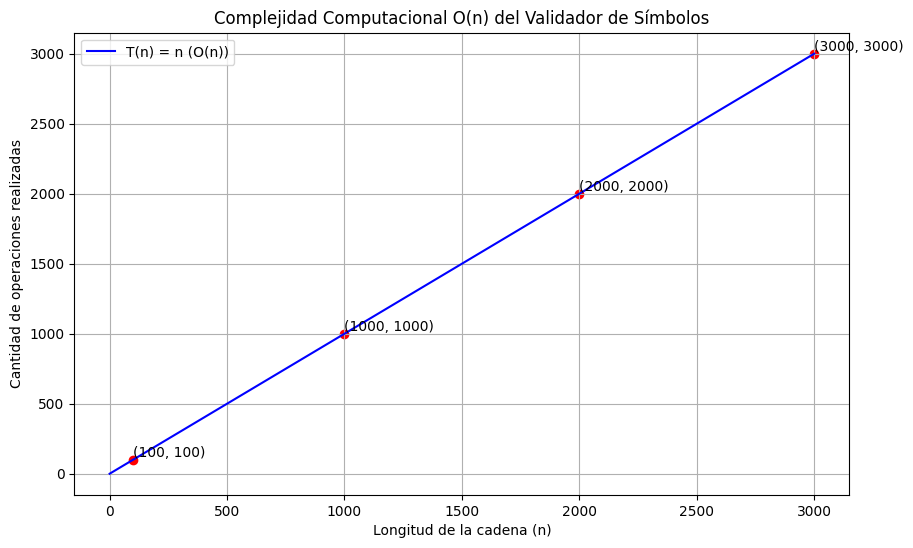

In [ ]:
plotter = SymbolMatcherPlot()
plotter.graficar()